In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class', axis=1)

In [5]:
y = df['class']

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid = {
    'n_estimators': [1, 5, 10, 20, 40, 100],
    'max_depth': [3, 4, 5, 6]
}

In [13]:
gb_model = GradientBoostingClassifier()

In [14]:
grid = GridSearchCV(gb_model, param_grid, n_jobs=-1)

In [15]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [16]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [17]:
predictions = grid.predict(X_test)

In [18]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [20]:
pd.DataFrame(grid.best_estimator_.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

,Feature Importance
odor_n,0.614744
stalk-root_c,0.135978
bruises_t,0.051184
stalk-root_r,0.036890
spore-print-color_r,0.030495
...,...
stalk-color-below-ring_p,0.000000
gill-color_e,0.000000
veil-color_o,0.000000
odor_y,0.000000


In [21]:
accuracy_score(y_test, predictions)

1.0

In [22]:
confusion_matrix(y_test, predictions)

array([[655,   0],
       [  0, 564]], dtype=int64)

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



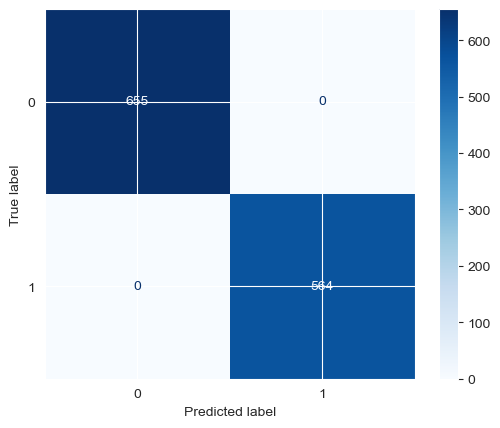

In [24]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot(cmap='Blues')

In [25]:
feat_import = grid.best_estimator_.feature_importances_

In [26]:
feat_import

array([2.91150176e-04, 6.38908470e-17, 0.00000000e+00, 0.00000000e+00,
       6.21148836e-17, 1.04524302e-03, 0.00000000e+00, 5.06011038e-06,
       0.00000000e+00, 0.00000000e+00, 4.47604476e-17, 0.00000000e+00,
       4.85302111e-17, 0.00000000e+00, 0.00000000e+00, 2.14688988e-08,
       2.31108933e-03, 5.11844758e-02, 1.84253604e-04, 1.40003812e-02,
       1.82499853e-02, 9.63715410e-05, 6.14744334e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 1.26751606e-17, 1.25094260e-02,
       1.14474988e-02, 0.00000000e+00, 9.40894619e-17, 4.58640473e-18,
       4.62074489e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.62075677e-17, 0.00000000e+00,
       4.39922283e-04, 1.23142722e-03, 1.35977555e-01, 7.71855052e-03,
       3.68899011e-02, 3.58176838e-03, 3.37268987e-04, 4.95063766e-06,
       1.83319493e-05, 2.54090956e-03, 2.93584163e-02, 2.42960368e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [27]:
feat_import = pd.Series(feat_import, index=X.columns)

In [28]:
feat_import

cap-shape_c    2.911502e-04
cap-shape_f    6.389085e-17
cap-shape_k    0.000000e+00
cap-shape_s    0.000000e+00
cap-shape_x    6.211488e-17
                   ...     
habitat_l      0.000000e+00
habitat_m      4.806965e-18
habitat_p      0.000000e+00
habitat_u      1.004851e-05
habitat_w      0.000000e+00
Length: 95, dtype: float64